# 0. Import required libraries

In [ ]:
import matplotlib.pyplot as plt #library for plotting
import numpy as np # for numeric computations

from sklearn.linear_model import LinearRegression #just LinearRegression model 


# 1. Gradient Descent

## Gradient Descent in one dimension 

In [ ]:
def one_dimensional_loss(x):
    # Takes the variable as input and gives the function value as output
    # Same as f(x) = x^2/4 - 2x + 5

    return (x**2)/4 - 2*x + 5

def one_dimensional_loss_gradient(x):
    # Takes the variable as input and gives the derivative of function as output
    # Same as f'(x) = x/2 - 2

    return x/2 - 2

In [ ]:
# Initialize the variable
x_init = np.random.uniform(-10, 10) # generate a random number
x_init

9.79128471695936

In [ ]:
learning_rate = 0.1 
# Learning rate is important. Try different values like 10, 100, 0.001 
# and see how the loss graph changes
num_iters = 200

In [ ]:
# This cell gives you the complete algorithm

x = x_init
costs = [] # store the costs at each iteration

for _ in range(num_iters):  #loop through the algo num_iters times
    cost = one_dimensional_loss(x) # Assign cost = function at x
    costs.append(cost) # adding cost at each iteration to costs
    dcost_dx = one_dimensional_loss_gradient(x) # finding gradient at x
    x = x - learning_rate * dcost_dx # Updating variable. xnext = xold - lr * gradient


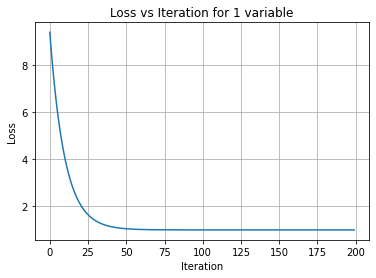

In [ ]:
# Now lets plot how the cost after each iteration looks like

plt.plot(costs) # plotting the costs
plt.xlabel('Iteration') #naming the xaxis
plt.ylabel('Loss') #naming the yaxis
plt.title('Loss vs Iteration for 1 variable') # Set a title
plt.grid()  # set a grid

In [ ]:
# Lets find the value of x finally after all the iterations
print(x)

4.000202999970336


## Gradient Descent in Two Dimensions 

In [ ]:
def two_dimensional_loss(x, y):
    # Takes the variables as input and gives the function value as output
    # Same as f(x, y) = x^4 + x^3 - 2x^2 + y^2

    return x**4 + x**3 -2*x**2 + y**2 

def two_dimensional_loss_gradient(x, y):
    # Takes the variables as input and gives the partial derivatives of function as output
    # Same as [d(f(x, y))/d(x) = 4x^3 + 3x^2 - 4x, d(f(x, y))/d(y) = 2y]

    return (4*x**3 + 3*x**2 -4*x , 2*y)

In [ ]:
# First step as usual, initialize the variables
x_init = -0.5
y_init = 4.5

# They can literally be anything. But lets say some random value

num_iters = 200 # Number of iterations
learning_rate = 0.1 # learning rate
# Once you have understood how learning rate works, 
# You can assign different learning rates for different variables
# say alpha_x and alpha_y and they update them in loop accordingly

In [ ]:
# Ahaan time to descent after all the initializations

x, y = x_init, y_init # initialize for the loop
costs = [] # same as last time. To store costs at all the iterations
for _ in range(num_iters):
    cost = two_dimensional_loss(x, y) # calculating the cost
    costs.append(cost) # appending to the costs list
    dx, dy = two_dimensional_loss_gradient(x, y) #calculating the gradient using the function
    # update step
    x = x - learning_rate * dx 
    y = y - learning_rate * dy
    # in case you have different learning rate, here is where 
    # you'll have to replace the learning rate variable accordingly

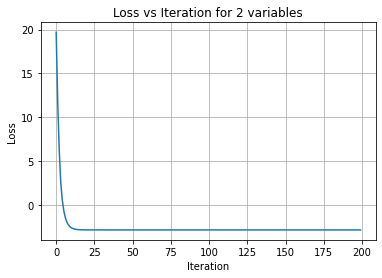

In [ ]:
# Now lets plot how the cost after each iteration looks like

plt.plot(costs) # plotting the costs
plt.xlabel('Iteration') #naming the xaxis
plt.ylabel('Loss') #naming the yaxis
plt.title('Loss vs Iteration for 2 variables') # Set a title
plt.grid()  # set a grid

In [ ]:
# what can be the final values of x & y?
print("x =", x)
print("y =", y)

x = -1.4430004681646915
y = 1.8672820059964457e-19


# 2. Linear Regression

## Getting the data

* Data collection is time consuming. Ugh!
* But essential for all machine learning problems
* Our main goal is to understand how Linear Regression works
* So... lets make our own!

## Linear Regression in 6 words
### Fit a line to the dataset

Here, I wish to show that linear regression can "discover" the true value of m and b for any data of the form y = m*x + b . Therefore, see how the results change when varying: 

1. m $\leftarrow$ Slope 
2. b $\leftarrow$ y-Intercept
3. x_min and x_max $\leftarrow$ Minimum and maximum of x in the dataset
4. n_points $\leftarrow$ Number of datapoints 
5. noise_coeff $\leftarrow$ Amount of noise

In [ ]:
# To make our data, lets first create a line
# then add random noise to it
# then predict a line that fits the data points

# Reference line parameters
m = 3.14
b = 11.23

x_min, x_max = -10, 10 # set a min and max value so that our data is restricted

#lets take 100 points

n_points = 100

# a coeff for defining noise
noise_coeff = 10

In [ ]:
# creates 100 points between x_min and x_max
X = np.linspace(x_min, x_max, num=n_points)
print(X)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [ ]:
# Adding noise to the value
Y = m*X + b + noise_coeff*np.random.normal(size=n_points)

Text(0, 0.5, 'Y')

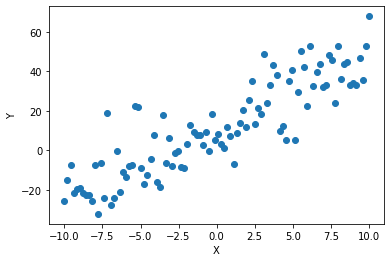

In [ ]:
# Now lets plot how the dataset might look like

plt.scatter(X, Y) # point plot
plt.xlabel('X')
plt.ylabel('Y')

There are 2 ways to find the optimal solution for linear regression
1. Closed-form Solution
2. Gradient Descent

## Closed Form Solution

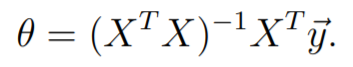

This algorithm works only for linear regression and no other machine learning model. So use it if the number of features are low.
$\theta$ here is a simple vector with $[m \quad b]$

\begin{align} y = (m \quad b)  \begin{pmatrix}X \\ 1 \end{pmatrix} = mX + b \end{align}

Hence if you have 1s as one of their rows so that it can be multiplied by 'b'.

An example has been shown below:
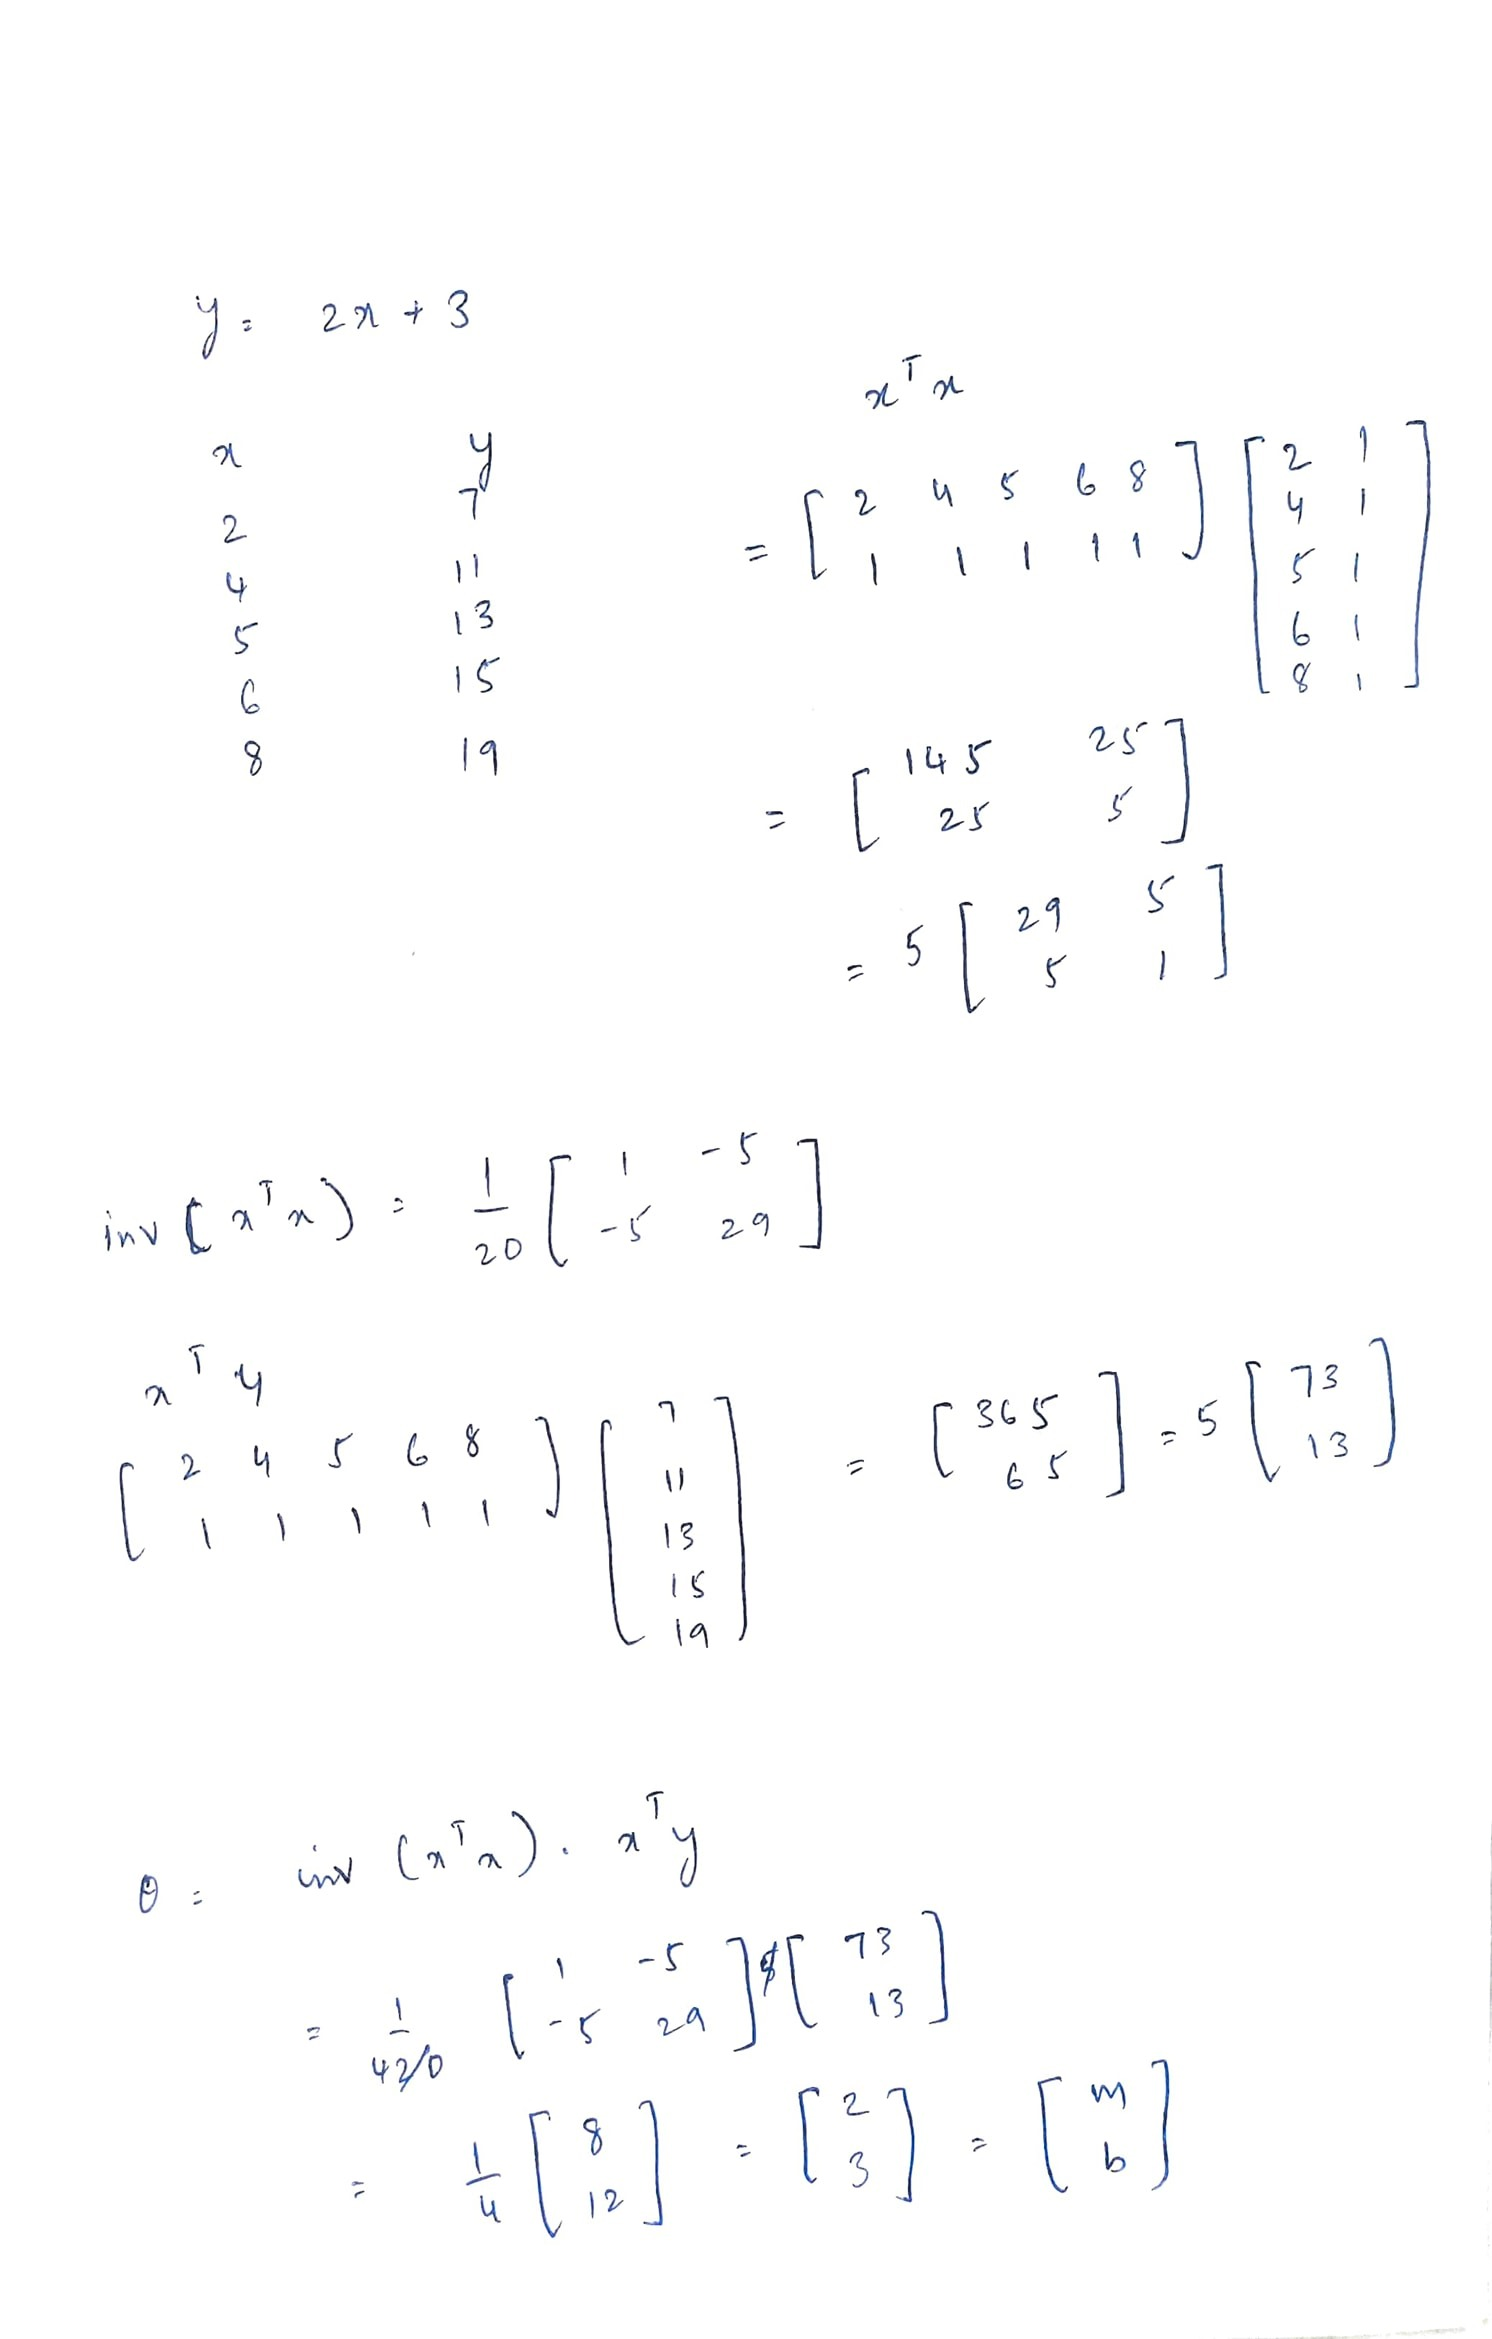

In [ ]:
# Now you see that 1s are needed as one of the rows in the X (input)
# Lets call that new X as X_dummied
X_dummied = np.zeros((n_points, 2)) #initialize a matrix of rows n_points and columns = 2 (1 for input, other for ones)

X_dummied[:, 1] = 1 # assign second column as ones
X_dummied[:, 0] = X # assign first column same as X

In [ ]:
# X @ Y of numpy is simply matrix multiplication

In [ ]:
# Lets break the equation into parts and 
# evaluate them separately
X_transpose = np.transpose(X_dummied)
X_transpose_X = np.transpose(X_dummied) @ X_dummied
inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.transpose(X_dummied) @ Y

# After calculating all parts,

m_found, b_found = inv @ X_transpose_y

In [ ]:
print(m_found, b_found)

3.5547252985460656 11.450905234701978


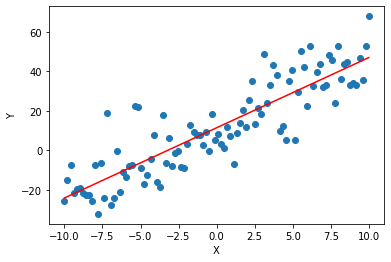

In [ ]:
# Now lets see how the line we have generated fits the data points

y_found = m_found*X + b_found # All the output values for inputs for parameters we have calculated


plt.scatter(X, Y) # plotting the original data as points
plt.plot(X, y_found, color = 'red') # drawing the line
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Gradient Descent Solution

In [ ]:
# Basic steps, like always
# Initialize learning rate, Number of iterations
# initialize parameters to some random values

learning_rate = 0.001
n_iters = 2000
m_gd, b_gd = np.random.uniform(low = -20, high = 20, size = 2)

In [ ]:
Y_gd = m_gd*X + b_gd

In [ ]:
m_gd, b_gd

(0.8972340576319979, -9.427148289099062)

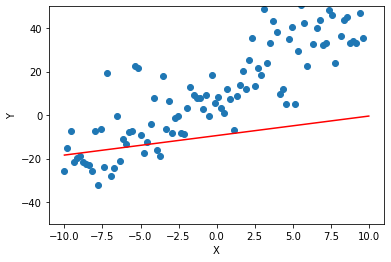

In [ ]:
# Let us check how the first line we have predicted looks like

plt.scatter(X, Y)
plt.plot(X, Y_gd, color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-50, 50])
plt.show()

Loss is the mean squared error. Finding the partial derivatives with respect to the parameters $m$ and $b$ is given below.

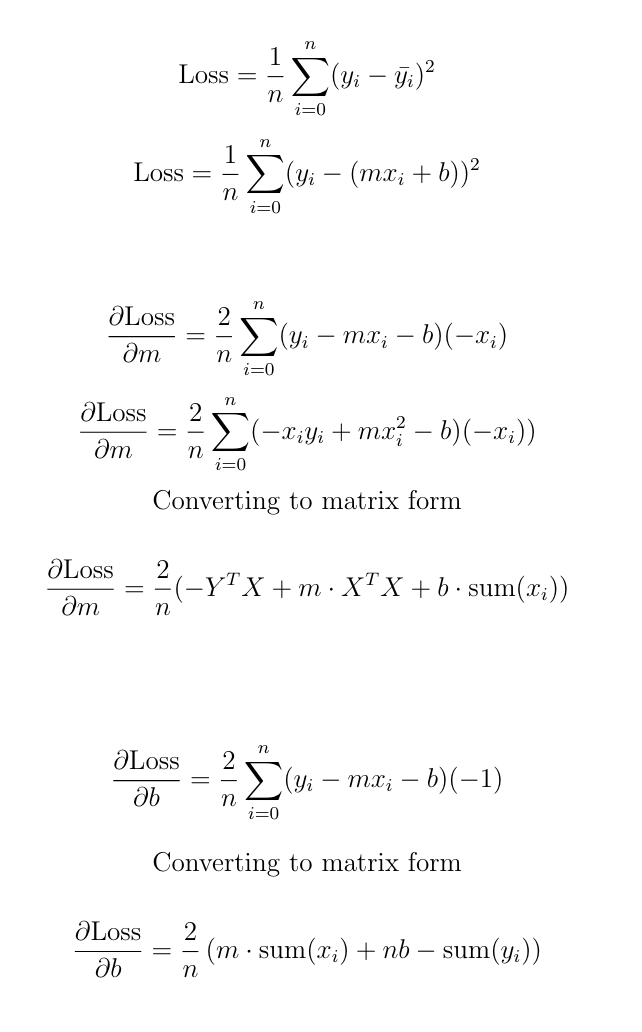

In [ ]:
# Ugh, ridiculous
# Now lets GDify it

costs = []
for _ in range(n_iters):
    Y_gd = m_gd*X + b_gd
    XT = np.transpose(X)
    YT = np.transpose(Y)

    cost = np.mean((Y - Y_gd)**2) # Loss function is Mean Squared Error
    costs.append(cost)

    #derivative wrt m like in the equations above
    dm = (2/n_points) * (-YT @ X + m_gd * XT @ X + b_gd * np.sum(X))
    #derivative wrt b like in the equations above
    db = (2/n_points) * (m_gd * np.sum(X) + n_points*b_gd - np.sum(Y))

    #update steps
    m_gd = m_gd - learning_rate*dm
    b_gd = b_gd - learning_rate*db

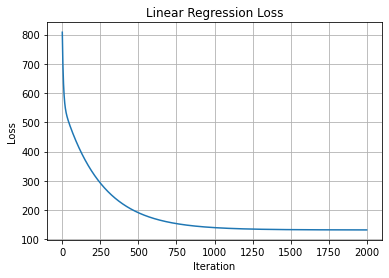

In [ ]:
# Like you have guessed, time to plot the loss
plt.plot(costs) # plotting the costs
plt.xlabel('Iteration') #naming the xaxis
plt.ylabel('Loss') #naming the yaxis
plt.title('Linear Regression Loss') # Set a title
plt.grid()  # set a grid

In [ ]:
print("m through gradient descent =", m_gd)
print("b through gradient descent =", b_gd)

m through gradient descent = 3.554725298546061
b through gradient descent = 11.070038904476574


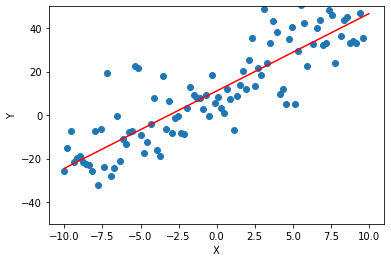

In [ ]:
# plotting the plot after optimization
Y_gd = m_gd*X + b_gd

plt.scatter(X, Y)
plt.plot(X, Y_gd, color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-50, 50])
plt.show()

## Scikit-Learn's solution (Closed Form internally)

In [ ]:
# Creating a sklearn defined LinearRegression object
lin_reg_model = LinearRegression()

In [ ]:
print(X.reshape(-1,1)[:5]) # printing the first 5 rows of the reshaped array

[[-10.        ]
 [ -9.7979798 ]
 [ -9.5959596 ]
 [ -9.39393939]
 [ -9.19191919]]


In [ ]:
# For the model to work properly, the training data has to be an array of arrays.
# every row represents the features for the data point
# Hence, although we have exactly one feature for a datapoint, we have to convert
# it into array of arrays so that the function works
# Hence X.reshape(-1, 1)

# This function fits the training and testing dataset to a line with required parameters
lin_reg_model.fit(X.reshape(-1, 1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# the two parameters can be printed as follows

print("m =", lin_reg_model.coef_) # m
print("b =", lin_reg_model.intercept_) #b

m = [3.5547253]
b = 11.450905234701978


In [ ]:
# Now predicting the output for given inputs
Y_sk = lin_reg_model.predict(X.reshape(-1, 1)) 

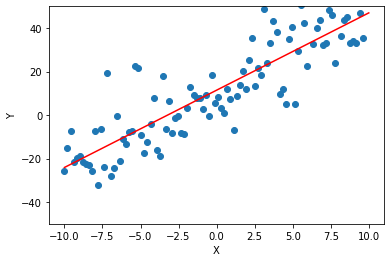

In [ ]:
# Time to plot to check how the values have turned out to be

plt.scatter(X, Y)
plt.plot(X, Y_sk, color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-50, 50])
plt.show()
